In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

In [4]:
from keras import backend as K
from keras.models import Model, Input, load_model
from keras.layers import Input, Dense, Embedding, BatchNormalization, \
                Concatenate, LSTM, Lambda,  Activation, \
                Conv1D, MaxPooling1D, Flatten, Reshape, Dropout, CuDNNGRU, Bidirectional, CuDNNLSTM, LSTM
from keras.optimizers import RMSprop, Adam, Adamax, SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from keras.layers.merge import add
from keras.utils import to_categorical

Using TensorFlow backend.


In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score as scikit_f1_score

#### Custom Functions

In [6]:
from src.callbacks import PlotCurves
from src.eval_metrics import f1_macro, f1_micro 
from src.load_data import load_data

In [7]:
from src.keras_attention import AttentionWithContext

### Load Data

In [8]:
train_data, valid_data, test_data, metadata = load_data()

### Prepare data

In [9]:
n_tags = 2
batch_size = 32

In [10]:
def get_input(data_, n_tags, is_test=False):
    
    X = np.array([sentence['sentence'].replace('\n', '').strip().lower() 
                  for article in data_ 
                  for sentence in article['sentences']])

    y = np.array([sentence['label'] 
                  for article in data_
                  for sentence in article['sentences']])

    if not is_test:
        y = to_categorical(y, num_classes=n_tags)
    
    return X, y

In [11]:
X_tra, y_tra = get_input(train_data, n_tags, False)
X_val, y_val = get_input(valid_data, n_tags, False)
X_test, y_test = get_input(test_data, n_tags, True)

In [12]:
X_tra.shape, y_tra.shape

((3582,), (3582, 2))

### Load ELMo

In [13]:
sess = tf.Session()
K.set_session(sess)

elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

def ELMoEmbedding(x):
    return elmo(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["elmo"]

In [3]:
def build_model_104(n_tags):
    
    elmo_input_layer = Input(shape=(None, ), dtype="string")
    x = Lambda(ELMoEmbedding, output_shape=(None, 1024))(elmo_input_layer)
    x = Bidirectional(CuDNNLSTM(256, return_sequences=True))(x)
    x = AttentionWithContext()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(2, activation='sigmoid')(x)

    return Model(inputs=elmo_input_layer, outputs=x)

def build_model_107(n_tags):
    
    elmo_input_layer = Input(shape=(None, ), dtype="string")
    x = Lambda(ELMoEmbedding, output_shape=(None, 1024))(elmo_input_layer)
    x = Bidirectional(CuDNNLSTM(512, return_sequences=True))(x)
    x = AttentionWithContext()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(2, activation='sigmoid')(x)

    return Model(inputs=elmo_input_layer, outputs=x)

def build_model_111(n_tags):
    
    elmo_input_layer = Input(shape=(None, ), dtype="string")
    x = Lambda(ELMoEmbedding, output_shape=(None, 1024))(elmo_input_layer)
    x = Bidirectional(CuDNNLSTM(512, return_sequences=True))(x)
    x = AttentionWithContext()(x)
    x = Dense(2, activation='sigmoid')(x)

    return Model(inputs=elmo_input_layer, outputs=x)

def build_model_112(n_tags):
    
    elmo_input_layer = Input(shape=(None, ), dtype="string")
    x = Lambda(ELMoEmbedding, output_shape=(None, 1024))(elmo_input_layer)
    x = Bidirectional(CuDNNLSTM(512, return_sequences=True))(x)
    x = AttentionWithContext()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(2, activation='sigmoid')(x)

    return Model(inputs=elmo_input_layer, outputs=x)

def build_model_113(n_tags):
    
    elmo_input_layer = Input(shape=(None, ), dtype="string")
    x = Lambda(ELMoEmbedding, output_shape=(None, 1024))(elmo_input_layer)
    x = Bidirectional(CuDNNLSTM(512, return_sequences=True))(x)
    x = AttentionWithContext()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(2, activation='sigmoid')(x)

    return Model(inputs=elmo_input_layer, outputs=x)

def build_model_114(n_tags):
    
    elmo_input_layer = Input(shape=(None, ), dtype="string")
    x = Lambda(ELMoEmbedding, output_shape=(None, 1024))(elmo_input_layer)
    x = Bidirectional(CuDNNLSTM(256, return_sequences=True))(x)
    x = AttentionWithContext()(x)
    x = Dense(2, activation='sigmoid')(x)

    return Model(inputs=elmo_input_layer, outputs=x)

def build_model_115(n_tags):
    
    elmo_input_layer = Input(shape=(None, ), dtype="string")
    x = Lambda(ELMoEmbedding, output_shape=(None, 1024))(elmo_input_layer)
    x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
    x = AttentionWithContext()(x)
    x = Dense(2, activation='sigmoid')(x)

    return Model(inputs=elmo_input_layer, outputs=x)

def build_model_116(n_tags):
    
    elmo_input_layer = Input(shape=(None, ), dtype="string")
    x = Lambda(ELMoEmbedding, output_shape=(None, 1024))(elmo_input_layer)
    x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
    x = AttentionWithContext()(x)
    x = Dense(2, activation='sigmoid')(x)

    return Model(inputs=elmo_input_layer, outputs=x)

def build_model_117(n_tags):
    
    elmo_input_layer = Input(shape=(None, ), dtype="string")
    x = Lambda(ELMoEmbedding, output_shape=(None, 1024))(elmo_input_layer)
    x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
    x = AttentionWithContext()(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(2, activation='sigmoid')(x)

    return Model(inputs=elmo_input_layer, outputs=x)

In [32]:
learningrate=0.001
optimizer = Adam(lr=learningrate)
optimizer_str = 'adam'
loss = 'binary_crossentropy'
metrics = ['acc', f1_macro, f1_micro]


In [33]:
model = build_model_104(n_tags)
model.summary()

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None)              0         
_________________________________________________________________
lambda_3 (Lambda)            (None, None, 1024)        0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 512)         1969152   
_________________________________________________________________
attention_with_context_2 (At (None, 512)               263168    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 2,298,242
Trainable params: 2,298,242
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_name = 'RQ2_elmo_attention_model_104' + \
             '_' + optimizer_str +  \
             '_lr_' + str(learningrate) +  \
             '_lrreduction' + \
             '_loss_' + loss

model_main = './Model/' + model_name.split('model')[0] + 'model/'
model_dir = os.path.join(model_main, model_name)
score_file = os.path.join(model_main, 'model_performances.csv')
results_file = os.path.join(model_dir, 'model_results_file.txt')

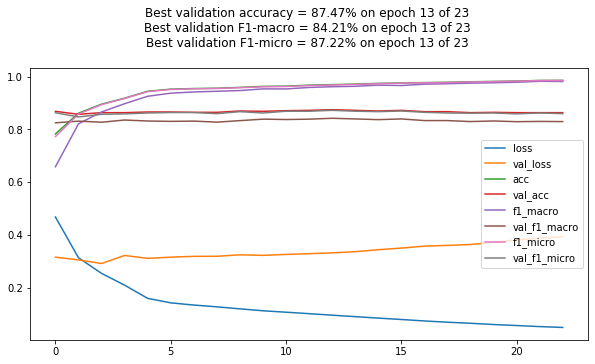

In [35]:
model.fit(X_tra, y_tra, 
          epochs=50, 
          batch_size=batch_size, 
          validation_data=(X_val, y_val), 
          callbacks=[
              PlotCurves(model_name=model_name, model_dir=model_dir, jnote=True),
              ReduceLROnPlateau(monitor='val_f1_macro', patience=3, 
                                factor=0.1, min_lr=0.00001),
              EarlyStopping(monitor='val_f1_macro', min_delta=0, patience=10, mode='max')
          ])

#### Load Best Model

In [36]:
model_name

'RQ2_elmo_attention_model_104_adam_lr_0.0001_lrreduction_loss_binary_crossentropy'

In [38]:
best_model = load_model(os.path.join(model_dir, model_name + '_best_f1_macro_model.h5'), 
                        custom_objects={'elmo':elmo, 'tf':tf, 'f1_macro':f1_macro, 'f1_micro':f1_micro,
                                       'AttentionWithContext': AttentionWithContext})

### Evaluation

In [39]:
#[x_val_words, x_val_sentences]
y_preds = best_model.predict(X_val, batch_size=batch_size)
y_preds = np.argmax(y_preds, axis=1)

In [40]:
y_val = np.argmax(y_val, axis=1)

In [41]:
clsrpt_val = classification_report(y_val, y_preds)
sfm_val = scikit_f1_score(y_val, y_preds, average='macro')
    
print(clsrpt_val)
print('\nScikit_F1_Macro:', sfm_val)

with open(results_file, 'w') as f:
    f.write('\n---------------- Validation ----------------\n')

with open(results_file, 'a') as f:
    f.write('\n' + clsrpt_val + '\n' + str(sfm_val) + '\n\n')

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       269
           1       0.81      0.80      0.81       130

   micro avg       0.87      0.87      0.87       399
   macro avg       0.86      0.86      0.86       399
weighted avg       0.87      0.87      0.87       399


Scikit_F1_Macro: 0.8568044788975021


In [42]:
# X, y = get_input(data_, n_tags, True)
# [x_test_words, x_test_sentences]
y_preds = best_model.predict(X_test, batch_size=batch_size)
y_preds = np.argmax(y_preds, axis=1)

In [43]:
clsrpt_test = classification_report(y_test, y_preds)
sfm_test = scikit_f1_score(y_test, y_preds, average='macro')
    
print(clsrpt_test)
print('\nScikit_F1_Macro:', sfm_test)

with open(results_file, 'a') as f:
    f.write('\n---------------- Test ----------------\n')

with open(results_file, 'a') as f:
    f.write('\n' + clsrpt_test + '\n' + str(sfm_test) + '\n\n')

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       325
           1       0.74      0.57      0.64       116

   micro avg       0.83      0.83      0.83       441
   macro avg       0.80      0.75      0.77       441
weighted avg       0.83      0.83      0.83       441


Scikit_F1_Macro: 0.768036891594913


In [44]:
if not os.path.exists(score_file):
    with open(score_file, 'w') as scrf:
        scrf.write("model_name,val_f1_macro,test_f1_macro\n")

with open(score_file, 'a') as scrf:
    scrf.write(
        '\n' + \
        model_name + ',' + \
        str(sfm_val) + ',' + \
        str(sfm_test) + '\n'
    )